# An analysis of Chicago's restaurant recommendation dataset

The analysis is derived from two datasets. One which has the session/interaction data for each customer and the other with the restaurant details such as the restaurant name and the cuisine that they serve. Here I have tried to analyze each dataset to identify any patterns in the data

### Import the necessary libraries

In [4]:
import os
import pandas as pd

### Load the session data

In [11]:
dir_name = os.getcwd()
folder_name = 'session'
files = os.listdir(os.path.join(dir_name, folder_name))

# The list of files has the README included. Let us remove the README from the list of files and sort the file
# in ascending order
files = sorted([file for file in files if not 'README' in file])
files

['session.1996-Q3',
 'session.1996-Q4',
 'session.1997-Q1',
 'session.1997-Q2',
 'session.1997-Q3',
 'session.1997-Q4',
 'session.1998-Q1',
 'session.1998-Q2',
 'session.1998-Q3',
 'session.1998-Q4',
 'session.1999-Q1',
 'session.1999-Q2']

In [12]:
# The number of records in each line is different. So let us find the maximum columns in all the files
length_of_columns = []
for file in files:
    file_path = os.path.join(dir_name, folder_name, file)
    df = pd.read_csv(file_path, header=None, sep='\n')
    df = df[0].str.split('\t', expand=True)
    length_of_columns.append(len(df.columns))
max_columns = max(length_of_columns)
max_columns

63

In [13]:
# Define the columns
start_columns = ['date', 'ip', 'entry_point']
restaurant_columns = [f'R{i}' for i in range(1, max_columns+1)]
columns = start_columns + restaurant_columns

In [17]:
# Load all the files
length_of_columns = []
file_paths = [os.path.join(dir_name, folder_name, file) for file in files]
df_from_each_file = (pd.read_csv(f, sep='\t', names=columns) for f in file_paths)
interactions = pd.concat(df_from_each_file, ignore_index=True)
print(len(interactions))
interactions.head()

50672


,date,ip,entry_point,R1,R2,R3,R4,R5,R6,R7,...,R54,R55,R56,R57,R58,R59,R60,R61,R62,R63
0,07/Sep/1996:12:17:05,www-c09.proxy.gnn.com,0,560L,110L,110,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/Sep/1996:12:21:57,foley.ripco.com,0,423L,77L,77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/Sep/1996:12:23:36,foley.ripco.com,0,633N,633N,159P,159P,475,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/Sep/1996:12:25:14,foley.ripco.com,0,441L,537L,537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/Sep/1996:15:18:38,pslip103d.egr-ri.ids.net,0,90M,90M,76L,476L,476,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Add the last non NaN value to the end_point column
interactions['end_point'] = interactions.ffill(axis=1).iloc[:, -1]

In [16]:
# vaildate one record from the session data. For example, let us look at the first row in session.1996-Q3
interactions[interactions['ip']=='www-c09.proxy.gnn.com']

,date,ip,entry_point,R1,R2,R3,R4,R5,R6,R7,...,R55,R56,R57,R58,R59,R60,R61,R62,R63,end_point
0,07/Sep/1996:12:17:05,www-c09.proxy.gnn.com,0,560L,110L,110,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
185,07/Sep/1996:12:18:11,www-c09.proxy.gnn.com,0,560L,110L,110L,110L,110,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110


### Analyze the sessions data

In [230]:
interactions.columns

Index(['date', 'ip', 'entry_point', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7',
       'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17',
       'R18', 'R19', 'R20', 'R21', 'R22', 'R23', 'R24', 'R25', 'R26', 'R27',
       'R28', 'R29', 'R30', 'R31', 'R32', 'R33', 'R34', 'R35', 'R36', 'R37',
       'R38', 'R39', 'R40', 'R41', 'R42', 'R43', 'R44', 'R45', 'R46', 'R47',
       'R48', 'R49', 'R50', 'R51', 'R52', 'R53', 'R54', 'R55', 'R56', 'R57',
       'R58', 'R59', 'R60', 'R61', 'R62', 'R63', 'end_point'],
      dtype='object')

In [231]:
# Some basic view of the data
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50672 entries, 0 to 50671
Data columns (total 67 columns):
date           50672 non-null object
ip             50672 non-null object
entry_point    50672 non-null object
R1             50672 non-null object
R2             50672 non-null object
R3             33520 non-null object
R4             24101 non-null object
R5             17920 non-null object
R6             13702 non-null object
R7             10667 non-null object
R8             8443 non-null object
R9             6684 non-null object
R10            5312 non-null object
R11            3844 non-null object
R12            2819 non-null object
R13            2086 non-null object
R14            1630 non-null object
R15            1305 non-null object
R16            1061 non-null object
R17            866 non-null object
R18            715 non-null object
R19            608 non-null object
R20            501 non-null object
R21            422 non-null object
R22            362 non

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

### How many of the entry points are 0

In [233]:
interactions['entry_point'].value_counts()

0        44669
227C        93
230C        87
197C        86
180D        84
         ...  
122F         1
206H         1
1141F        1
217B         1
588C         1
Name: entry_point, Length: 929, dtype: int64

It looks like most of the data points have an entry point that is not a restaurant name instead may have been a search criteria.

### How many of the end points are -1

In [234]:
interactions['end_point'].value_counts()

-1       6090
334       772
17        725
230       582
166       579
         ... 
289.0       1
278.0       1
321         1
12          1
334.0       1
Name: end_point, Length: 629, dtype: int64

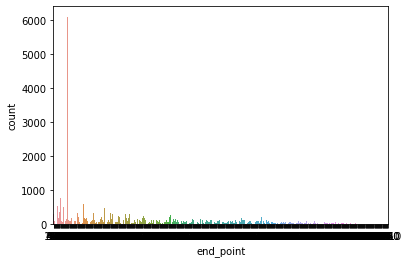

In [235]:
sns.countplot(data=interactions, x='end_point')

In [287]:
unknown_endpoints = 6090/50672
unknown_endpoints * 100

12.018471739816862

Only 12% of the dataset does not have a known end point

### What is the general pattern of navigation?

In [236]:
import numpy as np
interactions['list_of_non_nan_values'] = interactions.apply(lambda x :','.join(x.astype(str)),axis=1)

In [238]:
list_of_non_nan_values = list(interactions['list_of_non_nan_values'])
list_of_non_nan_values

['07/Sep/1996:12:17:05 ,www-c09.proxy.gnn.com,0,560L,110L,110,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,110',
 '07/Sep/1996:12:21:57 ,foley.ripco.com,0,423L,77L,77,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,77',
 '07/Sep/1996:12:23:36 ,foley.ripco.com,0,633N,633N,159P,159P,475,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,475',
 '07/Sep/1996:12:25:14 ,foley.ripco.com,0,441L,537L,537,nan,nan,nan,nan,nan,nan,nan,nan,n

In [239]:
import re
navigations = []

for row in list_of_non_nan_values:
    values = row.split(',')
    values = [value for value in values if 'nan' not in value][3:-1]
    navigation = [re.findall('[a-zA-Z]', value)[0] for value in values if re.findall('[a-zA-Z]', value)]
    navigations.append(navigation)

In [242]:
# create a table for each user's interaction. Users are the index and start from 0
navigations = pd.DataFrame.from_records(navigations)

In [244]:
navigations.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,L,L,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,L,L,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,N,N,P,P,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,L,L,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,M,M,L,L,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


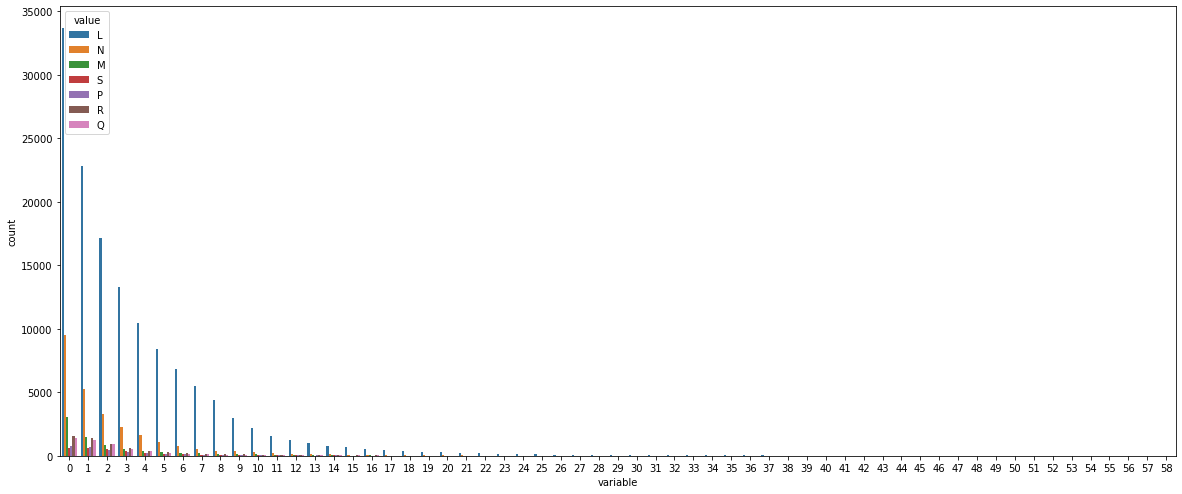

In [245]:
sns.countplot(x="variable", hue="value", data=pd.melt(navigations))
plt.gcf().set_size_inches(20, 8.27)
plt.show()

It looks like there is a long tail after 20 interactions. So we will limit the data to 20 interactions

In [246]:
navigations.drop([i for i in range(20, len(navigations.columns))], axis=1, inplace=True)

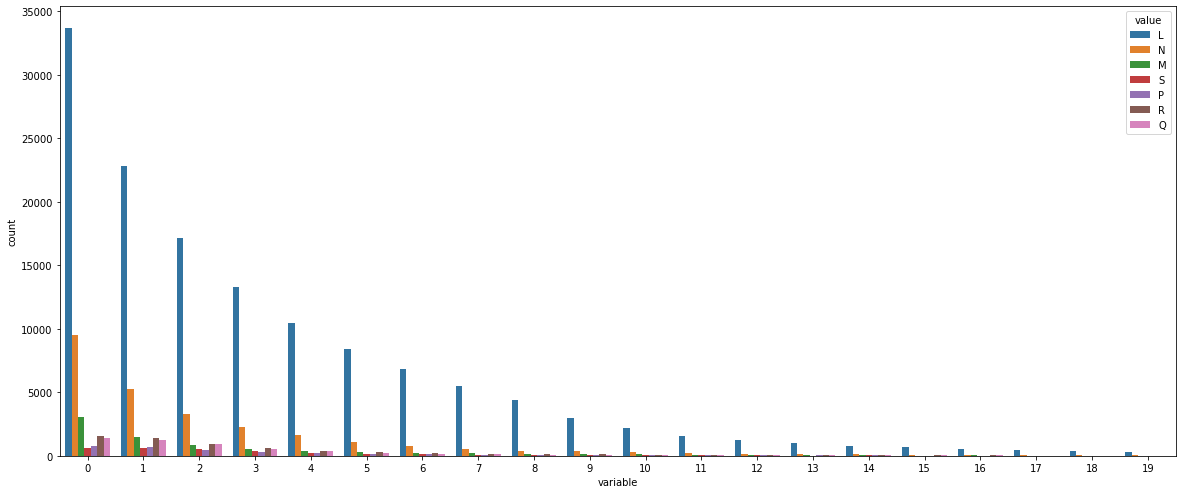

In [247]:
sns.countplot(x="variable", hue="value", data=pd.melt(navigations))
plt.gcf().set_size_inches(20, 8.27)
plt.show()

The naviagtion behavior of people is mostly browsing, followed by seeing nicer restaurants. It is interesting that people search for nicer resturants more than cheaper restaurants.

### Can we identify segments of customers from the interactions data?

In [248]:
# Let us consider the following mapping
mapping = {
    'L': 1,
    'M': 2,
    'N': 3,
    'O': 4,
    'P': 5,
    'Q': 6,
    'R': 7,
    'S': 8,
    'T': 9    
}

navigations = navigations.replace(mapping, regex=True)
navigations = navigations.fillna(0)
navigations.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This dataset can be clustered to find out clusters in which customers fall and find out the segment for the customer just in terms of their navigational pattern.

### Load the restaurant data

In [261]:
dir_name = os.getcwd()
folder_name = 'data'
files = os.listdir(os.path.join(dir_name, folder_name))

In [262]:
columns = ['restaurant_id', 'restaurant_name', 'restaurant_features']
file_paths = [os.path.join(dir_name, folder_name, file) for file in files]
df_from_each_file = (pd.read_csv(f, sep='\t', names=columns) for f in file_paths)
restaurants = pd.concat(df_from_each_file, ignore_index=True)
print(restaurants.head())
print(len(restaurants))
print(restaurants.columns)

  restaurant_id           restaurant_name  \
0             0                Moti Mahal   
1             1                   Village   
2             2  Millrose Brewing Company   
3             3             Dover Straits   
4             4       Eat Your Hearts Out   

                                 restaurant_features  
0                214 035 149 021 117 075 204 051 163  
1  026 249 174 004 132 249 198 191 192 125 075 20...  
2  137 249 194 215 213 174 249 191 192 008 075 20...  
3                137 190 174 249 212 075 205 053 165  
4    214 249 249 197 111 025 025 112 075 205 053 164  
4434
Index(['restaurant_id', 'restaurant_name', 'restaurant_features'], dtype='object')


In [264]:
# get all the unique restaurant ids
len(restaurants['restaurant_id'].unique())

1217

The restaurant ids repeat and we would like to know if this would affect the interactions data.

In [279]:
# The interactions data looks like this
interactions.head()

,date,ip,entry_point,R1,R2,R3,R4,R5,R6,R7,...,R55,R56,R57,R58,R59,R60,R61,R62,R63,end_point
0,07/Sep/1996:12:17:05,www-c09.proxy.gnn.com,0,560L,110L,110,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
1,07/Sep/1996:12:21:57,foley.ripco.com,0,423L,77L,77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
2,07/Sep/1996:12:23:36,foley.ripco.com,0,633N,633N,159P,159P,475,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475
3,07/Sep/1996:12:25:14,foley.ripco.com,0,441L,537L,537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
4,07/Sep/1996:15:18:38,pslip103d.egr-ri.ids.net,0,90M,90M,76L,476L,476,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476


We take a look at the the restaurants in the first row of the interactions data to see if we can match it to a restaurant.

In [273]:
restaurants[restaurants['restaurant_id'] == 560]

,restaurant_id,restaurant_name,restaurant_features
560,560,Taylor Brewing Company,137 194 215 213 174 184 008 074 204 053 163
1940,560,Petes' Place,083 229 106 074 204 052 164


In [278]:
restaurants[restaurants['restaurant_id'] == 110]

,restaurant_id,restaurant_name,restaurant_features
110,110,Green Door Tavern,026 178 184 063 010 001 008 074 204 052 163
786,110,Piazza Rodeo,252 249 248 251 149 063 156 125 074 205 053 165
1233,110,Haute New Orleans,NaN
1490,110,Cafe Baci,242 125 075 205 052 166
2707,110,Hinode,254 253 250 150 174 128 075 205 053 164
3098,110,Eat Your Vegetables,253 231 150 174 111 071 036 229 005 112 243 07...
3365,110,Viet Restaurant,250 250 191 246 076 205 052 163
3803,110,CAMELLIA GRILL,253 086 231 157 158 102 132 010 083 156 046 18...
4130,110,Ristorante Ecco,123 124 076 205 053 166


It appears like we would need more information to know the restaurants that the customer navigated to.

### What to do next?

1. How many interactions were there on a particular date (e.g. 07/Sep/1996)
2. How many interactions were there on a particular day of the week. (Are there more interactions on a particular day of the week?)
3. Is there a pattern with people who had more number of interactions? 
4. Segment users based on their navigation patterns. For e.g. browsers, people who like cheaper resturants first, people who like nice restaurants, people who like silent restaurants etc.
  4.1 Based on this segment when the user comes to the system next we can find out what restaurant to recommend to them.